<a href="https://colab.research.google.com/github/samrat19/UDACITY_TENSORFLOW_COURSE/blob/master/TensorFlow_Course.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# UDACITY TENSORFLOW COURSE

## Import Dependencies

we are importing tensorflow for showing errors and import numpy for showing our data in highly performant list

In [0]:
import tensorflow as tf

tf.logging.set_verbosity(tf.logging.ERROR)

import numpy as np

## Set up trainning data

In [11]:
celcius_q = np.array([-40, -10, 0, 8, 15, 22, 38], dtype=float)
farenhite_a = np.array([-40, 14,32, 46, 59, 72, 100], dtype=float)

for i,c in enumerate(celcius_q):
  print("{} degrees celcius = {} degree farenhite".format(c,farenhite_a[i]))

-40.0 degrees celcius = -40.0 degree farenhite
-10.0 degrees celcius = 14.0 degree farenhite
0.0 degrees celcius = 32.0 degree farenhite
8.0 degrees celcius = 46.0 degree farenhite
15.0 degrees celcius = 59.0 degree farenhite
22.0 degrees celcius = 72.0 degree farenhite
38.0 degrees celcius = 100.0 degree farenhite


## Some Machine learing terminology


*   **Feature:**  - The input to our model
*   **Lable** - Output of our Model which the model predicts
*   **Example** -- pair of input and output used during traing

## Create the Model

**next create the Model, we will use simplest possible model we can, a Dense Network. Since the problem is straight forward, this network will require only a single layer, with a single neuron**

## Build the layer

**we will call the layer 'layer0' and create it by installing tf.keras.layers.Dense with the following configuration: **

* **input_shape = [1] ==>  This specifies that the input to this layer is a single value. that is the shape is a one dimensional array with one  number. Since this is the first and only layer, that input shape is the input shape of the entire model. The single value is a floating point number, representing degree celcius** 

* **units=1 - This specifies the number of the neuron of the layer. The number of neurons defines how many internal variables the layer has to try to learn how to solve the problem (more later). Since this is the final layer, it is also the size of the model's output- a single float value representing degrees Farenhite (in a multilayer network , the size and shape of the later would need to match the input_shape of the next layer) ** 




In [0]:
layer0 = tf.keras.layers.Dense(units = 1, input_shape=[1])

# Assemble layers into the Model

**Once layers are defined, they need to be assembled into a model. The sequential model definition takes a list of layers as argument, specifying the calculation order from the input to the output**

**The model has just a single layer   layer0**

In [0]:
model = tf.keras.Sequential([layer0])

# Compile the Model with loss and optimizer function

** before ttraining the model has to be compiled. when compiled for trainning, the model is give: **

* ** Loss function --  A way of measureing how far off predictions are from the desired outcome.(The measured definition is called 'loss')**

* **Optimizer Function -- A way of adjusting internal values in order to reduce the loss**


** these are used during training (model.fit(),below) to first calculate the loss at each point and then improve it, in fact , the act of calculating the current loss of a model, then improving it is preciously what training is.**

**During training, the optimizer function is used to calculate adjustments to the model's internal variables. The goal is to aadjust the  internal variables until the model (which is really a math function) mirrors the actual equation for converting celcius to farenhite**

**Tensorflow uses numerical analysis to perform this tuning, and all this complexity is hidden from you, **

**The loss function (mean squared error) and the optimizer (Adam) used here standard for simple models like this one.**

**One part of the optimizer you may need to think about when building your own models is the learning rate ( 0.1 in the code above ) . This is step size taken when adjusting values in the model, iff the value os too small, it will take too many iteration to train the model. Too large and accuracy goes down. Finding a good value often involves some trial and error, but the range is ussualy within 0.001(default) and 0.1**


In [0]:
model.compile(loss = 'mean_squared_error', 
              optimizer = tf.keras.optimizers.Adam(0.1))

# Train the Model 

**Train the model by calling the fit method**

**During training the model takes  in celcius value , perform a calculation using the current internal variables (called "Weights") and output values which are meant to be the Farenhite equivalent. Since the wights are initially set randomly, the outputs will not be close to  the correct value. The difference between the actual output and the desired output is calcullated using loss function, and the optimizer function directs how the weights should be adjusted.**

**The cycle of calculate , compare,adjust is controlled by the fit method. The first argument is the inputs and the second argument is the desired outputs. The epochs arguments specifies how many times the cycle should be run, and the verbose argument controls how much the method produces**

In [15]:
history = model.fit(celcius_q,farenhite_a,epochs = 500, verbose = False)
print("Finis training the Model")

Finis training the Model


# Display training staticstics

**The fit method return a history Object. We can use the object to plot how the loss of our model goes down after a training epoch. A high loss means that the Farenhite degrees the model predicts is far from the corresponding values in the farenhite_a**

**We will use matplotlib to visualise this. As you can see , our model improves very quickly at first, and then has a steady, slow improvement until it is very near " perfect " towards the end**

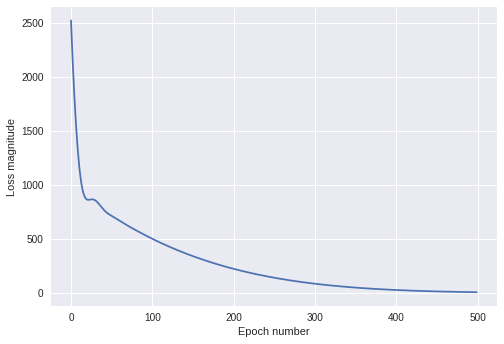

In [16]:
import matplotlib.pyplot as plt

plt.xlabel('Epoch number')
plt.ylabel("Loss magnitude")

plt.plot(history.history['loss'])

# Use the model to Predict values

**Now you have a model that has been trained to learn the relationship between celcius_q and farenhite_a. You can use the predict method to have it. Calculate the farenhite degrees for a previously unknown celcius degrees. 

In [17]:
print(model.predict([100]))

[[211.32721]]


# Looking at the layer weights

**finally let's print the internal variables of the Dense layer**

In [23]:
print('these are the layer variables:{}'.format(layer0.get_weights()))

these are the layer variables:[array([[1.8220906]], dtype=float32), array([29.11815], dtype=float32)]
